In [7]:
import sys
sys.path.append("..")

In [8]:
from data_tools.tools import *
from scipy.integrate import odeint
import seaborn as sns
from matplotlib import pyplot as plt
from DE_Library.diferential_equation_functionals import *

from matplotlib import rc
rc('text', usetex=True)

In [31]:
results_QNN = load_feather_folder_as_pd("../data/results/DE_7_31")

['../data/results/DE_7_31\\0.feather', '../data/results/DE_7_31\\1.feather']
0.16372275352478027


c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)


In [53]:
results_QNN["f_sol"][0].shape

(20,)

In [33]:
x_line = np.linspace(0.01, 0.9, 20)
f_odeint = odeint(mapping_of_derivatives_of_loss_functions["paper"], [1], x_line[:])[:,0].flatten()

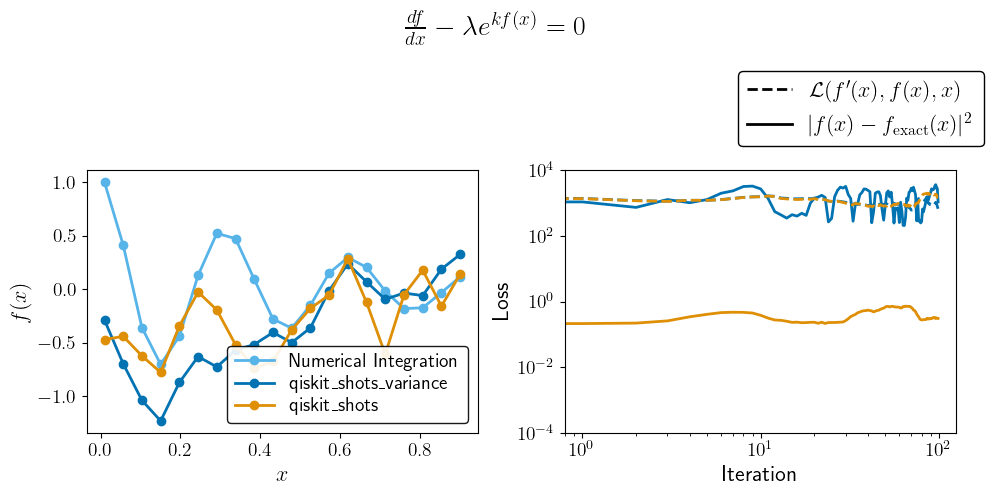

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap

#cmap = get_cmap("tab10")  # or another colormap of your choice

cmap = ListedColormap(sns.color_palette("colorblind", 10))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

FQK_color, PQK_color, QNN_color = cmap.colors[0], cmap.colors[1], cmap.colors[3]
RBF_color = cmap.colors[7]

x_span_plot = x_line

ax1.plot(x_span_plot, f_odeint, "-o", label="Numerical Integration", color=cmap.colors[9], linewidth=2)
for index in [0, 1]:
    ax1.plot(x_span_plot, results_QNN["f_sol"][index], "-o", color=cmap.colors[index], linewidth=2, label=results_QNN["executor_type"][index])

    ax2.plot(results_QNN["loss_history"][index], color=cmap.colors[index], linestyle="--", linewidth=2)
    ax2.plot(results_QNN["mse_history"][index], color=cmap.colors[index], linewidth=2)

ax1.legend()

# dummy plot for legend
ax2.plot([10**-12, 1.2*10**-12 ], color="black", linestyle="--", label="$\mathcal{L}(f^\prime(x), f(x), x)$", linewidth=2)
ax2.plot([10**-12, 1.2*10**-12 ], color="black", label="$|f(x)-f_{\mathrm{exact}}(x)|^2$", linewidth=2)





ax1.legend(fontsize=14, loc="lower right", edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
ax2.legend(fontsize=16, loc="lower right", bbox_to_anchor=(1.1, 1.05), edgecolor="black", fancybox=True, frameon=True, framealpha=1, labelspacing=0.5)

plt.suptitle(r"$\frac{df}{dx} - \lambda e^{kf(x)} = 0$", fontsize=20)

ax1.set_ylabel("$f(x)$", fontsize=16)
ax1.set_xlabel("$x$", fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2.set_ylabel("Loss", fontsize=16)
ax2.set_xlabel("Iteration", fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax2.set_yscale("log")
ax2.set_xscale("log")

ax2.set_ylim(10**-4, 10**4)
plt.tight_layout()
plt.show()

#fig.savefig("../plotting_notebooks/DE_log.png", bbox_inches='tight', dpi=400)
